Setup

In [120]:
# %pip install paddlepaddle-gpu
# %pip install groq -y
# !conda install numpy groq paddlepaddle -y
# !pip install pillow==9.5.0


In [121]:
# !wget https://github.com/adobe-fonts/source-code-pro/raw/release/OTF/SourceCodePro-Regular.otf -O ../data/fonts/SourceCodePro-Regular.otf

In [122]:
# !wget https://github.com/googlefonts/noto-fonts/blob/main/hinted/ttf/NotoSansKannada/NotoSansKannada-Regular.ttf?raw=true -O ../data/fonts/NotoSansKannada-Regular.ttf

In [123]:
# !sudo mv NotoSansKannada-Regular.ttf /usr/share/fonts/

In [124]:
# !sudo fc-cache -f -v

In [125]:
# !fc-list | grep Kannada

# OCR with bounding boxes

In [126]:
# %pip install albumentations --user

In [127]:
print("hi")

hi


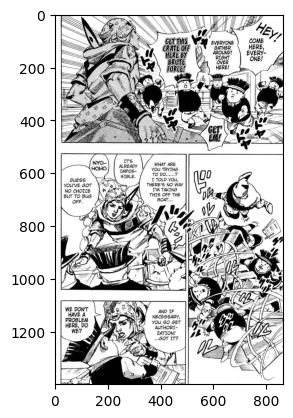

In [128]:
import cv2
import matplotlib.pyplot as plt

plt.imshow(cv2.imread('../data/images/36.jpg'))

In [129]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
from PIL import Image

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Path to your image
image_path = '../data/images/36.jpg'

# Perform OCR on the image
result = ocr.ocr(image_path, cls=True)

# Extract bounding boxes and text
boxes = [line[0] for line in result[0]]
texts = [line[1][0] for line in result[0]]

# Print bounding boxes and text
for box, text in zip(boxes, texts):
    print(f"Box: {box}, Text: {text}")

# Visualize the results
image = Image.open(image_path).convert('RGB')

[2024/10/19 15:18:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/akxy4321/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/akxy4321/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

In [130]:
# for idx in range(len(result)):
#     res = result[idx]
#     if res == None:
#         continue
#     boxes = [line[0] for line in res]
#     txts = [line[1][0] for line in res]
#     scores = [line[1][1] for line in res]
#     im_show = draw_ocr(image, boxes, txts, scores, font_path = '../data/fonts/SourceCodePro-Regular.otf')
#     im_show = Image.fromarray(im_show)
#     im_show.save(f'result_page_{idx}.jpg')

In [131]:
# import cv2
# plt.imshow(cv2.imread('result_page_0.jpg'))

# Translation

In [132]:
# groq_translation.py
import json
from typing import Optional

from groq import Groq
from pydantic import BaseModel

# Set up the Groq client
client = Groq(api_key="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")

# Model for the translation
class Translation(BaseModel):
    text: str
    comments: Optional[str] = None


# Translate text using the Groq API
def groq_translate(query, from_language, to_language):
    # Create a chat completion
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": f"You are a helpful assistant that translates text from {from_language} to {to_language}."
                           f"You will only reply with the translation text and nothing else in JSON."
                           f" The JSON object must use the schema: {json.dumps(Translation.model_json_schema(), indent=2)}",
            },
            {
                "role": "user",
                "content": f"Translate '{query}' from {from_language} to {to_language}."
            }
        ],
        model="llama3-70b-8192", # "llama-3.2-90b-text-preview"
        temperature=0.2,
        max_tokens=1024,
        stream=False,
        response_format={"type": "json_object"},
    )
    # Return the translated text
    return Translation.model_validate_json(chat_completion.choices[0].message.content)

In [133]:
response = groq_translate("hi how are you", from_language="english", to_language="hindi")
text = response.text
text

'नमस्ते कैसे हो'

In [134]:
response = groq_translate("an apple a day keeps the doctor away", from_language="english", to_language="kannada")
text = response.text
text

'ಒಂದು ಸೇಬು ದಿನಕ್ಕೆ ವೈದ್ಯರನ್ನು ದೂರವಿಡುತ್ತದೆ'

In [135]:
response = groq_translate("Are you made of stardust? Because every moment with you feels like a glimpse of the universe", from_language="english", to_language="kannada")
text = response.text
text

'ಅಂಗర్రవి క్ర్విత్ర్వి? ಅಂಗర్రవి న్ర్వి ప్ర్విత్ర్వి వ్ర్విత్ర్వి ప్ర్విత్ర్వి'

# Combining the two

In [136]:
boxes

[[[773.0, 23.0], [860.0, 62.0], [841.0, 108.0], [754.0, 70.0]],
 [[414.0, 88.0], [504.0, 88.0], [504.0, 118.0], [414.0, 118.0]],
 [[734.0, 90.0], [791.0, 90.0], [791.0, 112.0], [734.0, 112.0]],
 [[590.0, 101.0], [677.0, 101.0], [677.0, 117.0], [590.0, 117.0]],
 [[407.0, 115.0], [513.0, 115.0], [513.0, 141.0], [407.0, 141.0]],
 [[729.0, 107.0], [791.0, 111.0], [789.0, 139.0], [727.0, 135.0]],
 [[598.0, 118.0], [666.0, 115.0], [667.0, 135.0], [599.0, 139.0]],
 [[413.0, 140.0], [499.0, 140.0], [499.0, 171.0], [413.0, 171.0]],
 [[594.0, 137.0], [669.0, 134.0], [670.0, 154.0], [595.0, 158.0]],
 [[722.0, 136.0], [799.0, 136.0], [799.0, 160.0], [722.0, 160.0]],
 [[603.0, 155.0], [661.0, 151.0], [663.0, 173.0], [605.0, 177.0]],
 [[735.0, 158.0], [788.0, 158.0], [788.0, 179.0], [735.0, 179.0]],
 [[426.0, 169.0], [494.0, 169.0], [494.0, 197.0], [426.0, 197.0]],
 [[610.0, 174.0], [658.0, 174.0], [658.0, 194.0], [610.0, 194.0]],
 [[420.0, 194.0], [496.0, 191.0], [498.0, 223.0], [421.0, 226.0]],
 [

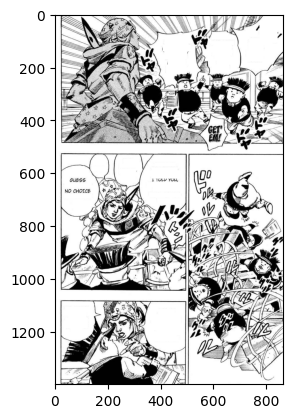

In [137]:
# prompt: these are the contents of boxes : [[[416.0, 278.0], [483.0, 276.0], [483.0, 294.0], [417.0, 296.0]],
#  [[417.0, 294.0], [482.0, 294.0], [482.0, 312.0], [417.0, 312.0]],
#  [[429.0, 312.0], [470.0, 312.0], [470.0, 330.0], [429.0, 330.0]],
#  [[422.0, 330.0], [478.0, 330.0], [478.0, 347.0], [422.0, 347.0]],
#  [[421.0, 346.0], [478.0, 346.0], [478.0, 364.0], [421.0, 364.0]],
#  [[423.0, 365.0], [473.0, 365.0], [473.0, 382.0], [423.0, 382.0]]]. Draw a white box in the numpy image called 'image' and store the contents in a new image

import numpy as np
from PIL import Image

# Assuming 'image' is your NumPy image and 'boxes' is the list of bounding boxes

image_np = np.array(image)  # Convert PIL Image to NumPy array if needed

new_image = image_np.copy()  # Create a copy of the image to draw on

for box in boxes:
  x1, y1 = int(min(box[0][0], box[1][0])), int(min(box[0][1], box[1][1]))
  x2, y2 = int(max(box[2][0], box[3][0])), int(max(box[2][1], box[3][1]))
  cv2.rectangle(new_image, (x1, y1), (x2, y2), (255, 255, 255), -1)  # Draw a white filled rectangle

new_image_pil = Image.fromarray(new_image)
# Now you can save or display the new_image_pil
new_image_pil.save('image_with_white_boxes.jpg')
plt.imshow(new_image_pil)

## naive method of translating ocr text

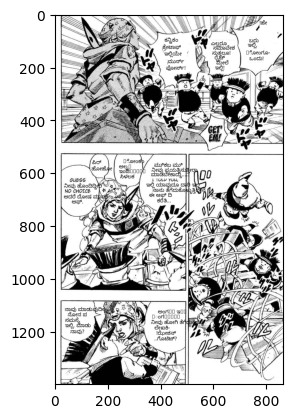

In [138]:
# prompt: modify this so that the text is written onto a new image called "translated_image", with the text written on the coordinates specified by box: [[416.0, 278.0], [483.0, 276.0], [483.0, 294.0], [417.0, 296.0]]. The original image is new_image_pil. Modify this code for it :
# for box, text in zip(boxes, texts):
#     translated_text = groq_translate(text, from_language="english", to_language="kannada").text

from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import json
from typing import Optional
from groq import Groq
from pydantic import BaseModel
from PIL import ImageDraw, ImageFont

translated_image = new_image_pil.copy()
draw = ImageDraw.Draw(translated_image)
font = ImageFont.truetype("../data/fonts/NotoSansKannada-Regular.ttf", size=20)


for box, text in zip(boxes, texts):
    translated_text = groq_translate(text, from_language="english", to_language="kannada").text
    # Assuming 'box' is a list of coordinates [x1, y1, x2, y2]
    x1, y1 = int(box[0][0]), int(box[0][1])
    x2, y2 = int(box[2][0]), int(box[2][1])

    # Calculate the center point of the bounding box
    # x_center = (x1 + x2) // 2
    # y_center = (y1 + y2) // 2
    # Define coordinates for text placement within the box
    text_x = x1
    text_y = y1

    draw.text((text_x, text_y), translated_text, fill=(0, 0, 0), font=font)

# Save the image with the translated text
translated_image.save("translated_image.jpg")

plt.imshow(translated_image)

## here, we can see that it doesn't group the sentences properly --> which results in incorrect translation.

In [139]:
boxes

[[[773.0, 23.0], [860.0, 62.0], [841.0, 108.0], [754.0, 70.0]],
 [[414.0, 88.0], [504.0, 88.0], [504.0, 118.0], [414.0, 118.0]],
 [[734.0, 90.0], [791.0, 90.0], [791.0, 112.0], [734.0, 112.0]],
 [[590.0, 101.0], [677.0, 101.0], [677.0, 117.0], [590.0, 117.0]],
 [[407.0, 115.0], [513.0, 115.0], [513.0, 141.0], [407.0, 141.0]],
 [[729.0, 107.0], [791.0, 111.0], [789.0, 139.0], [727.0, 135.0]],
 [[598.0, 118.0], [666.0, 115.0], [667.0, 135.0], [599.0, 139.0]],
 [[413.0, 140.0], [499.0, 140.0], [499.0, 171.0], [413.0, 171.0]],
 [[594.0, 137.0], [669.0, 134.0], [670.0, 154.0], [595.0, 158.0]],
 [[722.0, 136.0], [799.0, 136.0], [799.0, 160.0], [722.0, 160.0]],
 [[603.0, 155.0], [661.0, 151.0], [663.0, 173.0], [605.0, 177.0]],
 [[735.0, 158.0], [788.0, 158.0], [788.0, 179.0], [735.0, 179.0]],
 [[426.0, 169.0], [494.0, 169.0], [494.0, 197.0], [426.0, 197.0]],
 [[610.0, 174.0], [658.0, 174.0], [658.0, 194.0], [610.0, 194.0]],
 [[420.0, 194.0], [496.0, 191.0], [498.0, 223.0], [421.0, 226.0]],
 [

In [140]:
texts

['HEY!',
 'GETTHIS',
 'COME',
 'EVERYONE',
 'CRATEOFF',
 'HERE,',
 'GATHER',
 'HEREBY',
 'AROUND!',
 'EVERY-',
 'RIGHT',
 'ONE!',
 'BRUTE',
 'OVER',
 'FORCE!',
 'HERE!',
 'NYO-',
 "IT'S",
 'ALREADY',
 'WHAT ARE',
 'HOHO',
 'IMPOS-',
 'YOU TRYING',
 'SIBLE.',
 'TO DO.....',
 "YOU'VEGOT",
 "THERE'S NO WAY",
 "I'M TAKING",
 'BUT TO BUG',
 'THIS OFF THE',
 'OFF.',
 'BOAT...',
 "WEDON'T",
 'AND IF',
 'HAVE A',
 'NECESSARY,',
 'PROBLEM',
 'YOU GOGET',
 'HERE,DO',
 'AUTHORI-',
 'WE?',
 'ZATION!',
 '..GOTIT?']

In [141]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You must convert the given array of strings into a coherent sentence",
        },
        {
            "role": "user",
            "content": f"{texts}",
        }
    ],
    model="llama3-70b-8192",
)

coherent_sentence = chat_completion.choices[0].message.content
print(coherent_sentence)

After analyzing the given array of strings, I've attempted to reorder and connect them to form a coherent sentence. Here's my attempt:

"HEY! EVERYONE, GATHER HEREBY! IT'S ALREADY IMPOSSIBLE. YOU'RE TRYING TO DO WHAT ARE YOU TRYING TO DO.....? I'M TAKING AUTHORIZATION! WE DON'T HAVE A NECESSARY PROBLEM, BUT IF YOU GO GET IT, THEN WE'VE GOT IT!"

Please note that the original array of strings seems to be a mix of phrases, words, and sentence fragments, which were likely extracted from different contexts. The resulting sentence might not be perfect, but I've tried to create a coherent sentence while preserving the original words and tone.


In [143]:
# translated_text = groq_translate(coherent_sentence, from_language="english", to_language="kannada").text
# translated_text

BadRequestError: Error code: 400 - {'error': {'message': "Failed to generate JSON. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'json_validate_failed', 'failed_generation': '```json\n{\n   "text": "ನೀಡಿದ ಸ್ಟ್ರಿಂಗ್ ಅಣೆಯನ್ನು ವಿಶ್ಲೇಷಿಸಿದ ನಂತರ, ಅವುಗಳನ್ನು ಪುನಃ ಕ್ರಮವಾಗಿ ಜೋಡಿಸಿ ಒಂದು ಸಂಪೂರ್ಣ ವಾಕ್ಯವನ್ನು ರಚಿಸಲು ಪ್ರಯತ್ನಿಸಿದೆ. ನನ್ನ ಪ್ರಯತ್ನವು ಇದು:\n\n\\"ಹೇ! ಎಲ್ಲರೂ, ಇಲ್ಲಿಗೆ ಸೇರಿ! ಇದು ಈಗಾಗಲೇ ಅಸಾಧ್ಯ. ನೀವು ಏನು ಮಾಡಲು ಪ್ರಯತ್ನಿಸುತ್ತಿದ್ದೀರಿ...? ನಾನು ಅಧಿಕಾರವನ್ನು ತೆಗೆದುಕೊಳ್ಳುತ್ತಿದ್ದೇನೆ! ನಮಗೆ ಅಗತ್ಯವಾದ ಸಮಸ್ಯೆ ಇಲ್ಲ, ಆದರೆ ನೀವು ಹೋಗಿ ಅದನ್ನು ಪಡೆದುಕೊಂಡರೆ, ಆಗ ನಾವು ಅದನ್ನು ಹೊಂದಿದ್ದೇವೆ!\n\nದಯವಿಟ್ಟು ಗಮನಿಸಿ, ಮೂಲ ಸ್ಟ್ರಿಂಗ್ ಅಣೆಯು ವಿವಿಧ ಸಂದರ್ಭಗಳಿಂದ ತೆಗೆದುಕೊಂಡ ವಾಕ್ಯ ಭಾಗಗಳು, ವಾಕ್ಯಗಳು ಮತ್ತು ವಾಕ್ಯ ಅಂಶಗಳ ಮಿಶ್ರಣವಾಗಿದೆ. ಆದ್ದರಿಂದ ಫಲಿತ ವಾಕ್ಯವು ಪರಿಪೂರ್ಣವಾಗಿರಬಹುದು, ಆದರೆ ನಾನು ಮೂಲ ಪದಗಳು ಮತ್ತು ಟೋನ್ ಅನ್ನು ಉಳಿಸಿಕೊಂಡು ಸಂಪೂರ್ಣ ವಾಕ್ಯವನ್ನು ಸೃಷ್ಟಿಸಲ'}}

In [91]:
# boxes

[[[773.0, 23.0], [860.0, 62.0], [841.0, 108.0], [754.0, 70.0]],
 [[414.0, 88.0], [504.0, 88.0], [504.0, 118.0], [414.0, 118.0]],
 [[734.0, 90.0], [791.0, 90.0], [791.0, 112.0], [734.0, 112.0]],
 [[590.0, 101.0], [677.0, 101.0], [677.0, 117.0], [590.0, 117.0]],
 [[407.0, 115.0], [513.0, 115.0], [513.0, 141.0], [407.0, 141.0]],
 [[729.0, 107.0], [791.0, 111.0], [789.0, 139.0], [727.0, 135.0]],
 [[598.0, 118.0], [666.0, 115.0], [667.0, 135.0], [599.0, 139.0]],
 [[413.0, 140.0], [499.0, 140.0], [499.0, 171.0], [413.0, 171.0]],
 [[594.0, 137.0], [669.0, 134.0], [670.0, 154.0], [595.0, 158.0]],
 [[722.0, 136.0], [799.0, 136.0], [799.0, 160.0], [722.0, 160.0]],
 [[603.0, 155.0], [661.0, 151.0], [663.0, 173.0], [605.0, 177.0]],
 [[735.0, 158.0], [788.0, 158.0], [788.0, 179.0], [735.0, 179.0]],
 [[426.0, 169.0], [494.0, 169.0], [494.0, 197.0], [426.0, 197.0]],
 [[610.0, 174.0], [658.0, 174.0], [658.0, 194.0], [610.0, 194.0]],
 [[420.0, 194.0], [496.0, 191.0], [498.0, 223.0], [421.0, 226.0]],
 [

In [144]:
def get_bounding_box(rectangle):
    """
    Given a rectangle defined by its corner coordinates, return the bounding box.

    Parameters:
    - rectangle: A list of four points, where each point is a list of [x, y].

    Returns:
    - A tuple (x_min, y_min, x_max, y_max) representing the bounding box.
    """
    x_coords = [point[0] for point in rectangle]
    y_coords = [point[1] for point in rectangle]

    x_min = min(x_coords)
    y_min = min(y_coords)
    x_max = max(x_coords)
    y_max = max(y_coords)

    return (x_min, y_min, x_max, y_max)

# Get bounding boxes for each rectangle
bounding_boxes = [get_bounding_box(rect) for rect in boxes]

bounding_boxes

[(754.0, 23.0, 860.0, 108.0),
 (414.0, 88.0, 504.0, 118.0),
 (734.0, 90.0, 791.0, 112.0),
 (590.0, 101.0, 677.0, 117.0),
 (407.0, 115.0, 513.0, 141.0),
 (727.0, 107.0, 791.0, 139.0),
 (598.0, 115.0, 667.0, 139.0),
 (413.0, 140.0, 499.0, 171.0),
 (594.0, 134.0, 670.0, 158.0),
 (722.0, 136.0, 799.0, 160.0),
 (603.0, 151.0, 663.0, 177.0),
 (735.0, 158.0, 788.0, 179.0),
 (426.0, 169.0, 494.0, 197.0),
 (610.0, 174.0, 658.0, 194.0),
 (420.0, 191.0, 498.0, 226.0),
 (605.0, 189.0, 659.0, 215.0),
 (140.0, 551.0, 194.0, 573.0),
 (258.0, 547.0, 298.0, 566.0),
 (242.0, 567.0, 312.0, 583.0),
 (375.0, 561.0, 457.0, 576.0),
 (138.0, 575.0, 197.0, 595.0),
 (242.0, 585.0, 306.0, 605.0),
 (365.0, 580.0, 464.0, 596.0),
 (246.0, 605.0, 306.0, 626.0),
 (363.0, 593.0, 467.0, 622.0),
 (34.0, 640.0, 138.0, 656.0),
 (345.0, 636.0, 486.0, 655.0),
 (369.0, 656.0, 464.0, 672.0),
 (33.0, 681.0, 140.0, 697.0),
 (356.0, 675.0, 476.0, 694.0),
 (63.0, 700.0, 107.0, 720.0),
 (386.0, 696.0, 447.0, 712.0),
 (37.0, 1107.0

In [145]:
boxes

[[[773.0, 23.0], [860.0, 62.0], [841.0, 108.0], [754.0, 70.0]],
 [[414.0, 88.0], [504.0, 88.0], [504.0, 118.0], [414.0, 118.0]],
 [[734.0, 90.0], [791.0, 90.0], [791.0, 112.0], [734.0, 112.0]],
 [[590.0, 101.0], [677.0, 101.0], [677.0, 117.0], [590.0, 117.0]],
 [[407.0, 115.0], [513.0, 115.0], [513.0, 141.0], [407.0, 141.0]],
 [[729.0, 107.0], [791.0, 111.0], [789.0, 139.0], [727.0, 135.0]],
 [[598.0, 118.0], [666.0, 115.0], [667.0, 135.0], [599.0, 139.0]],
 [[413.0, 140.0], [499.0, 140.0], [499.0, 171.0], [413.0, 171.0]],
 [[594.0, 137.0], [669.0, 134.0], [670.0, 154.0], [595.0, 158.0]],
 [[722.0, 136.0], [799.0, 136.0], [799.0, 160.0], [722.0, 160.0]],
 [[603.0, 155.0], [661.0, 151.0], [663.0, 173.0], [605.0, 177.0]],
 [[735.0, 158.0], [788.0, 158.0], [788.0, 179.0], [735.0, 179.0]],
 [[426.0, 169.0], [494.0, 169.0], [494.0, 197.0], [426.0, 197.0]],
 [[610.0, 174.0], [658.0, 174.0], [658.0, 194.0], [610.0, 194.0]],
 [[420.0, 194.0], [496.0, 191.0], [498.0, 223.0], [421.0, 226.0]],
 [

## one way to overcome the incorrect grouping is by merging overlapping boxes/ boxes with common edges into one, and then considering each "big" group of texts as one sentence : this results in more accurate translation

In [147]:
# def merge_bounding_boxes_with_texts(bboxes, texts, horizontal_threshold=10, vertical_threshold=15):
#     """
#     Merge bounding boxes and corresponding texts that are close to each other into larger boxes.

#     Parameters:
#     - bboxes: List of bounding boxes (x_min, y_min, x_max, y_max)
#     - texts: List of texts corresponding to the bounding boxes
#     - horizontal_threshold: Max horizontal distance to merge
#     - vertical_threshold: Max vertical distance to merge

#     Returns:
#     - List of merged bounding boxes and corresponding texts
#     """
#     if len(bboxes) == 0 or len(texts) == 0:
#         return [], []

#     # Sort bounding boxes and texts by the y coordinate (top-left corner)
#     indexed_bboxes = sorted(enumerate(bboxes), key=lambda x: x[1][1])
#     sorted_texts = [texts[i] for i, _ in indexed_bboxes]
#     sorted_bboxes = [b[1] for b in indexed_bboxes]

#     merged_boxes = []
#     merged_texts = []
#     current_box = list(sorted_bboxes[0])  # Start with the first bounding box
#     current_text = sorted_texts[0]         # Start with the first text

#     for i in range(1, len(sorted_bboxes)):
#         next_box = sorted_bboxes[i]
#         next_text = sorted_texts[i]

#         # Check for vertical proximity
#         if (next_box[1] <= current_box[3] + vertical_threshold) and \
#            (next_box[0] <= current_box[2] + horizontal_threshold):
#             # Extend current box and concatenate texts
#             current_box[0] = min(current_box[0], next_box[0])  # Update x_min
#             current_box[1] = min(current_box[1], next_box[1])  # Update y_min
#             current_box[2] = max(current_box[2], next_box[2])  # Update x_max
#             current_box[3] = max(current_box[3], next_box[3])  # Update y_max
#             current_text += ' ' + next_text                      # Concatenate text
#         else:
#             # No proximity, add current box and text to merged list and start new ones
#             merged_boxes.append(tuple(current_box))
#             merged_texts.append(current_text)
#             current_box = list(next_box)
#             current_text = next_text

#     # Add the last box and text
#     merged_boxes.append(tuple(current_box))
#     merged_texts.append(current_text)

#     return merged_boxes, merged_texts

# # Example bounding boxes (x_min, y_min, x_max, y_max) and their corresponding texts
# # bounding_boxes = [
# #     (50, 100, 80, 120),  # "A"
# #     (50, 125, 80, 145),  # "man"
# #     (50, 150, 80, 170),  # "is"
# #     (150, 100, 180, 120), # "a"
# #     (150, 125, 180, 145)  # "cat"
# # ]
# # texts = [
# #     "A",
# #     "man",
# #     "is",
# #     "a",
# #     "cat"
# # ]

# merged_bboxes, merged_texts = merge_bounding_boxes_with_texts(bounding_boxes, texts)
# print("Merged Bounding Boxes:", merged_bboxes)
# print("Merged Texts:", merged_texts)



def intersecting_boxes(box1, box2, threshold=15):
    """
    Check if two boxes intersect with a given threshold, considering both expansion (+threshold)
    and contraction (-threshold).

    Args:
        box1 (list): Coordinates of the first box [(x1, y1), (x2, y2), (x3, y3), (x4, y4)].
        box2 (list): Coordinates of the second box [(x1, y1), (x2, y2), (x3, y3), (x4, y4)].
        threshold (float): Distance threshold for considering boxes as intersecting.

    Returns:
        bool: True if the boxes intersect within the threshold, False otherwise.
    """
    
    # Extract x and y coordinates for both boxes
    x1_coords = [point[0] for point in box1]
    x2_coords = [point[0] for point in box2]
    y1_coords = [point[1] for point in box1]
    y2_coords = [point[1] for point in box2]

    # Determine the bounding box for both sets of coordinates
    x1_min, y1_min = min(x1_coords), min(y1_coords)
    x1_max, y1_max = max(x1_coords), max(y1_coords)

    x2_min, y2_min = min(x2_coords), min(y2_coords)
    x2_max, y2_max = max(x2_coords), max(y2_coords)

    # Check if the boxes intersect considering both expansion (+threshold) and contraction (-threshold)
    
    # For x-coordinates
    x_overlap_expanded = not (x1_max + threshold < x2_min or x2_max + threshold < x1_min)
    x_overlap_contracted = not (x1_max - threshold < x2_min or x2_max - threshold < x1_min)
    
    # For y-coordinates
    y_overlap_expanded = not (y1_max + threshold < y2_min or y2_max + threshold < y1_min)
    y_overlap_contracted = not (y1_max - threshold < y2_min or y2_max - threshold < y1_min)

    # Return True if either expanded or contracted ranges overlap in both x and y coordinates
    return (x_overlap_expanded and y_overlap_expanded) or (x_overlap_contracted and y_overlap_contracted)





def merge_boxes(box1, box2):
    """
    Merges two boxes.

    Args:
        box1 (list): The first box.
        box2 (list): The second box.

    Returns:
        list: The merged box.
    """

    x_coords = [point[0] for point in box1+box2]
    y_coords = [point[1] for point in box1+box2]

    x1 = min(x_coords)
    x2 = max(x_coords)
    y1 = min(y_coords)
    y2 = max(y_coords)

    return [(x1, y1), (x2, y1), (x2, y2), (x1, y2)]

def merge_intersecting_boxes(super_boxes):
    """
    Merges intersecting boxes.

    Args:
        boxes (list): A list of boxes.

    Returns:
        list: A list of merged boxes.
    """
    merged_super_boxes = []
    for super_box in super_boxes:
        box, text = super_box
        if not merged_super_boxes:
            merged_super_boxes.append(super_box)
        else:
            intersecting = False
            for i, merged_super_box in enumerate(merged_super_boxes):
                merged_box, merged_text = merged_super_box
                if intersecting_boxes(merged_box, box):

                    new_super_box = (merge_boxes(merged_box, box), merged_text + " " + text)

                    merged_super_boxes[i] = new_super_box
                    intersecting = True
                    break
            if not intersecting:
                merged_super_boxes.append(super_box)
    return merged_super_boxes

super_boxes = list(zip(boxes, texts))
super_boxes.sort(key=lambda super_box:super_box[0][1], reverse=True)
merged_boxes = merge_intersecting_boxes(super_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
print(merged_boxes)

[([(722.0, 23.0), (860.0, 23.0), (860.0, 179.0), (722.0, 179.0)], 'HEY! HERE, COME EVERY- ONE!'), ([(590.0, 101.0), (677.0, 101.0), (677.0, 215.0), (590.0, 215.0)], 'EVERYONE GATHER RIGHT OVER HERE! AROUND!'), ([(407.0, 88.0), (513.0, 88.0), (513.0, 226.0), (407.0, 226.0)], 'CRATEOFF GETTHIS HEREBY BRUTE FORCE!'), ([(345.0, 561.0), (486.0, 561.0), (486.0, 712.0), (345.0, 712.0)], "THERE'S NO WAY TO DO..... I'M TAKING YOU TRYING WHAT ARE THIS OFF THE BOAT..."), ([(363.0, 1116.0), (476.0, 1116.0), (476.0, 1238.0), (363.0, 1238.0)], 'YOU GOGET NECESSARY, AUTHORI- ZATION! AND IF ..GOTIT?'), ([(242.0, 547.0), (312.0, 547.0), (312.0, 626.0), (242.0, 626.0)], "ALREADY IMPOS- IT'S SIBLE."), ([(138.0, 551.0), (197.0, 551.0), (197.0, 595.0), (138.0, 595.0)], 'HOHO NYO-'), ([(33.0, 681.0), (140.0, 681.0), (140.0, 720.0), (33.0, 720.0)], 'BUT TO BUG OFF.'), ([[34.0, 640.0], [138.0, 640.0], [138.0, 656.0], [34.0, 656.0]], "YOU'VEGOT"), ([(37.0, 1107.0), (127.0, 1107.0), (127.0, 1212.0), (37.0, 1212

In [119]:
for a in enumerate(merged_bboxes):
    print(a) # , key=lambda x: x[1][1])

(0, (407.0, 23.0, 860.0, 226.0))
(1, (140.0, 547.0, 298.0, 573.0))
(2, (33.0, 561.0, 486.0, 720.0))
(3, (37.0, 1107.0, 127.0, 1127.0))
(4, (38.0, 1116.0, 476.0, 1238.0))


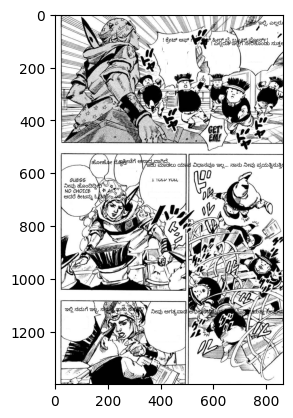

In [150]:
translated_image = new_image_pil.copy()
draw = ImageDraw.Draw(translated_image)
font = ImageFont.truetype("../data/fonts/NotoSansKannada-Regular.ttf", size=20)


for box, text in merged_boxes:
    translated_text = groq_translate(text, from_language="english", to_language="kannada").text

    x1, y1, x2, y2 = get_bounding_box(box) # convert from 4 point to 4 coords

    # Calculate the center point of the bounding box
    # x_center = (x1 + x2) // 2
    # y_center = (y1 + y2) // 2
    # Define coordinates for text placement within the box
    text_x = x1
    text_y = y1

    draw.text((text_x, text_y), translated_text, fill=(0, 0, 0), font=font)

# Save the image with the translated text
translated_image.save("translated_image_better.jpg")

plt.imshow(translated_image)

## ok, now a new problem is improper text filling

In [108]:
# %pip install Pillow==9.5.0

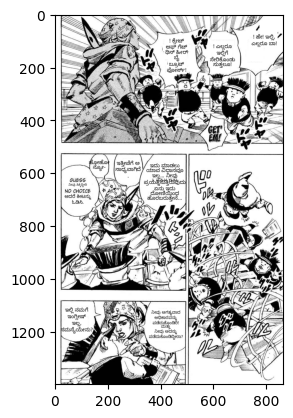

In [155]:
import textwrap
from PIL import Image, ImageDraw, ImageFont

translated_image = new_image_pil.copy()
draw = ImageDraw.Draw(translated_image)
font = ImageFont.truetype("../data/fonts/NotoSansKannada-Regular.ttf", size=20)

def draw_text_in_rectangle(image, text, font_path, box, max_font_size):
    draw = ImageDraw.Draw(image)
    x1, y1, x2, y2 = box
    w, h = x2 - x1, y2 - y1

    for font_size in range(max_font_size, 0, -1):
        font = ImageFont.truetype(font_path, font_size)
        # Initial wrap based on bounding box width
        lines = textwrap.wrap(text, width=int(w / draw.textbbox((0, 0), ' ', font=font)[2]))
        wrapped_lines = []
        for line in lines:
            # Further wrap each line if it exceeds the bounding box width
            while draw.textbbox((0, 0), line, font=font)[2] > w:
                split_index = line.rfind(' ', 0, int(len(line) * w / draw.textbbox((0, 0), line, font=font)[2]))
                if split_index == -1:
                    break
                wrapped_lines.append(line[:split_index])
                line = line[split_index + 1:]
            wrapped_lines.append(line)
        
        total_text_height = sum([draw.textbbox((0, 0), line, font=font)[3] for line in wrapped_lines])
        if total_text_height <= h:
            y_offset = y1 + (h - total_text_height) // 2
            for line in wrapped_lines:
                line_width, line_height = draw.textbbox((0, 0), line, font=font)[2], draw.textbbox((0, 0), line, font=font)[3]
                draw.text(((x1 + (w - line_width) // 2), y_offset), line, font=font, fill="black")
                y_offset += line_height
            break
    return image

# Use the function to draw text in each bounding box
for box, text in merged_boxes:
    translated_text = groq_translate(text, from_language="english", to_language="kannada").text
    translated_image = draw_text_in_rectangle(translated_image, translated_text, "../data/fonts/NotoSansKannada-Regular.ttf", get_bounding_box(box), max_font_size=20)

# Save the image with the translated text
translated_image.save("translated_image_better.jpg")

plt.imshow(translated_image)

In [156]:
merged_texts

['HEY! GETTHIS COME EVERYONE HERE, CRATEOFF GATHER AROUND! EVERY- HEREBY RIGHT ONE! BRUTE OVER HERE! FORCE!',
 "IT'S NYO-",
 "WHAT ARE ALREADY HOHO YOU TRYING IMPOS- TO DO..... SIBLE. THERE'S NO WAY YOU'VEGOT I'M TAKING THIS OFF THE BUT TO BUG BOAT... OFF.",
 "WEDON'T",
 'AND IF HAVE A NECESSARY, PROBLEM YOU GOGET HERE,DO AUTHORI- WE? ZATION! ..GOTIT?']